Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Load HR Features

In [2]:
import wfdb
from scipy.signal import butter, filtfilt
import neurokit2 as nk

record = wfdb.rdrecord("100", pn_dir="mitdb")
signal = record.p_signal[:,0]
fs = record.fs

def bandpass(sig, fs, low=0.5, high=40):
    nyq = fs/2
    b,a = butter(4, [low/nyq, high/nyq], btype="band")
    return filtfilt(b,a,sig)

filtered = bandpass(signal, fs)

signals, info = nk.ecg_process(filtered, sampling_rate=fs)
rpeaks = info["ECG_R_Peaks"]

rr = np.diff(rpeaks)/fs
hr = 60/rr
t_hr = rpeaks[1:]/fs

hr_series = pd.Series(hr, index=pd.to_timedelta(t_hr, unit="s"))


HR Overview

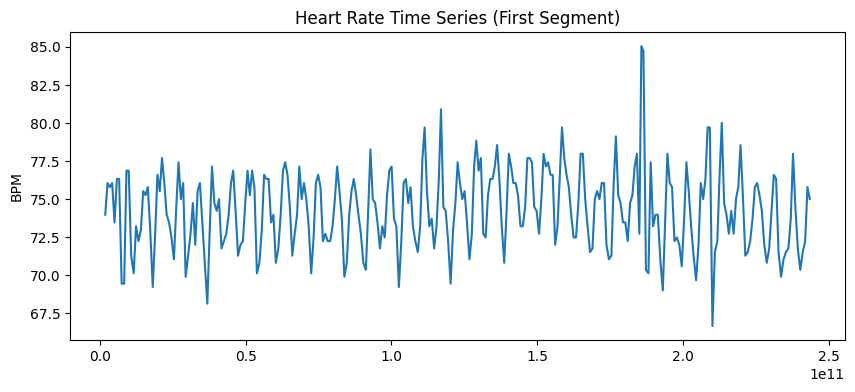

count    2270.000000
mean       75.682062
std         3.681330
min        64.477612
25%        72.972973
50%        75.261324
75%        77.697842
max        91.914894
dtype: float64

In [3]:
plt.figure(figsize=(10,4))
plt.plot(hr_series[:300])
plt.title("Heart Rate Time Series (First Segment)")
plt.ylabel("BPM")
plt.show()

hr_series.describe()


Smoothing

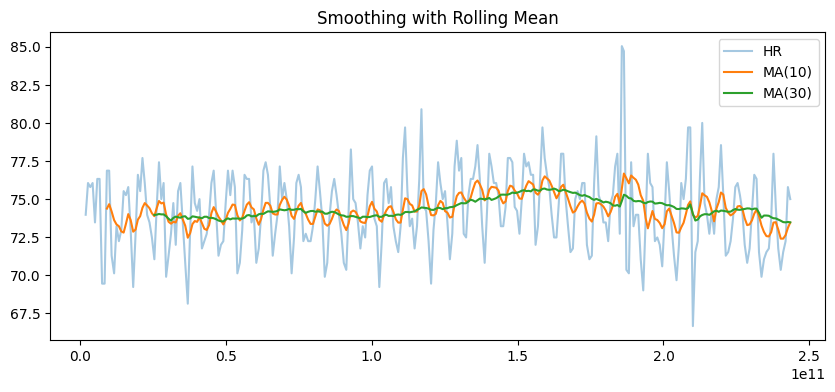

In [4]:
hr_ma10 = hr_series.rolling(10).mean()
hr_ma30 = hr_series.rolling(30).mean()

plt.figure(figsize=(10,4))
plt.plot(hr_series[:300], alpha=0.4, label="HR")
plt.plot(hr_ma10[:300], label="MA(10)")
plt.plot(hr_ma30[:300], label="MA(30)")
plt.legend()
plt.title("Smoothing with Rolling Mean")
plt.show()


Decomposition

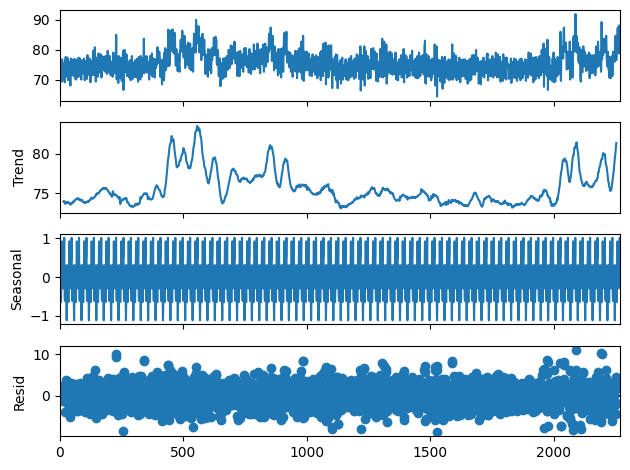

In [6]:

hr_series_fixed = hr_series.copy()
hr_series_fixed.index = np.arange(len(hr_series_fixed))

decomp = seasonal_decompose(hr_series_fixed, model="additive", period=30)
decomp.plot()
plt.show()


ACF / PACF

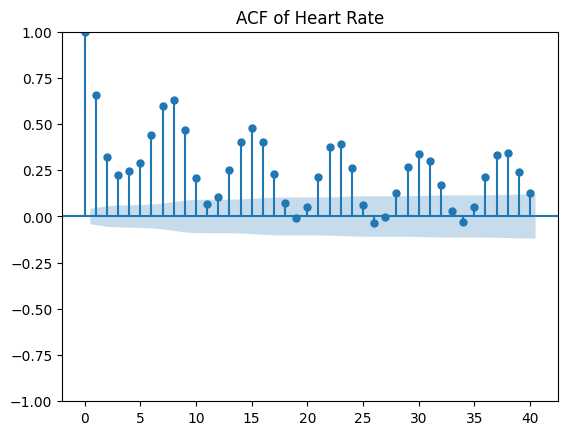

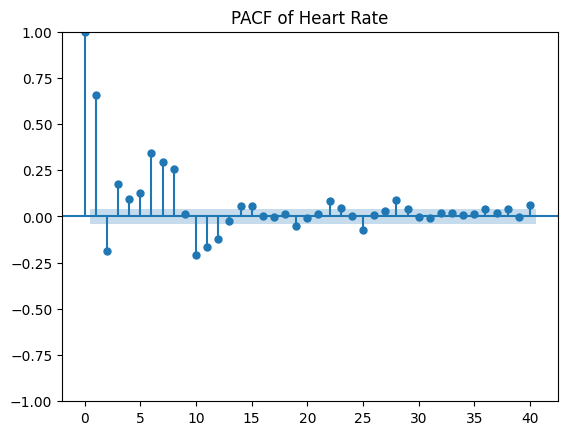

In [7]:
plot_acf(hr, lags=40)
plt.title("ACF of Heart Rate")
plt.show()

plot_pacf(hr, lags=40)
plt.title("PACF of Heart Rate")
plt.show()


Variability & Outliers

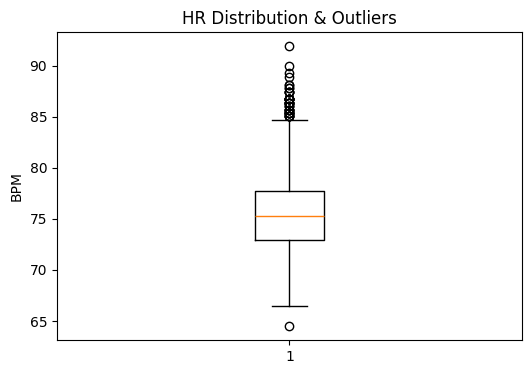

In [8]:
plt.figure(figsize=(6,4))
plt.boxplot(hr, vert=True)
plt.title("HR Distribution & Outliers")
plt.ylabel("BPM")
plt.show()


Save Figures for Report

In [11]:
import os

os.makedirs("../reports/figures", exist_ok=True)


In [ ]:
plt.figure(figsize=(10,4))
plt.plot(hr_series[:300])
plt.title("HR Time Series")

plt.savefig("../reports/figures/hr_series.png", dpi=150)
plt.close()


In [15]:
plt.figure(figsize=(10,4))
plt.plot(hr_series[:300], alpha=0.4, label="HR")
plt.plot(hr_series.rolling(10).mean()[:300], label="MA(10)")
plt.plot(hr_series.rolling(30).mean()[:300], label="MA(30)")
plt.legend()
plt.title("HR Smoothing with Rolling Mean")

plt.savefig("../reports/figures/hr_smoothing.png", dpi=150)
plt.close()


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

hr_simple = hr_series.reset_index(drop=True)
decomp = seasonal_decompose(hr_simple, model="additive", period=30)

fig = decomp.plot()
fig.set_size_inches(10,8)

plt.savefig("../reports/figures/hr_decomposition.png", dpi=150)
plt.close()


In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8,4))
plot_acf(hr, lags=40)
plt.title("ACF of Heart Rate")

plt.savefig("../reports/figures/acf_hr.png", dpi=150)
plt.close()


<Figure size 800x400 with 0 Axes>

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(8,4))
plot_pacf(hr, lags=40)
plt.title("PACF of Heart Rate")

plt.savefig("../reports/figures/pacf_hr.png", dpi=150)
plt.close()


<Figure size 800x400 with 0 Axes>

In [20]:
plt.figure(figsize=(5,5))
plt.boxplot(hr)
plt.title("Heart Rate Distribution")
plt.ylabel("BPM")

plt.savefig("../reports/figures/hr_boxplot.png", dpi=150)
plt.close()
